In [1]:
## EDA libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
 

## feature engineering libraries
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.model_selection import train_test_split

## model preparation libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

## model evaluation libraries
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn import metrics
from sklearn.model_selection import RepeatedKFold

## model hyperparameter tuning
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import joblib
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
berry_data = pd.read_csv(r"F:\Guided Project\Wild Blueberry Yield Prediction\WildBlueberryPollinationSimulationData.csv")
berry_data.head(20)

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543
5,5,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.309669,0.366284,27.345454,2825.003738
6,6,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.284443,0.352186,26.101179,2625.269164
7,7,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.246568,0.342826,25.042361,2379.905214
8,8,37.5,0.75,0.25,0.25,0.25,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.427977,0.414711,32.334153,4234.868585
9,9,37.5,0.75,0.25,0.25,0.25,77.4,46.8,64.7,55.8,27.0,45.8,1.0,0.10,0.464366,0.436346,34.849953,5356.871861


In [3]:
Q1 = berry_data.quantile(0.25)  # 25th percentile for each column
Q3 = berry_data.quantile(0.75)  # 75th percentile for each column
IQR = Q3 - Q1  # IQR for each column


In [4]:
bbry_data_iqr = berry_data[~((berry_data < (Q1 - 1.5 * IQR)) | 
                                   (berry_data > (Q3 + 1.5 * IQR))).any(axis=1)]


In [5]:
bbry_data_iqr

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754,754,25.0,0.50,0.38,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,1.0,0.10,0.558394,0.478666,39.448650,7184.013843
755,755,25.0,0.50,0.38,0.63,0.50,69.7,42.1,58.2,50.2,24.3,41.2,16.0,0.26,0.494678,0.429703,34.784888,6292.960756
756,756,25.0,0.50,0.38,0.63,0.50,69.7,42.1,58.2,50.2,24.3,41.2,1.0,0.10,0.502842,0.430369,35.185971,6374.444297
757,757,25.0,0.50,0.38,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.513889,0.458966,37.209554,6180.951419


In [6]:
bbry_data_iqr.drop("Row#",axis=1,inplace=True)

### Feature Selection - Correlation based

In [7]:
def select_features_corr_based(X_train,y_train,X_test):
    fs_corr = SelectKBest(score_func = f_regression,k=10)
    fs_corr.fit(X_train,y_train)
    X_train_cor = fs_corr.transform(X_train)
    X_test_cor= fs_corr.transform(X_test)
    
    
    return X_train_cor, X_test_cor, fs_corr

In [8]:
X = bbry_data_iqr.drop("yield",axis=1)
y=bbry_data_iqr["yield"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 503 entries, 314 to 43
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clonesize             503 non-null    float64
 1   honeybee              503 non-null    float64
 2   bumbles               503 non-null    float64
 3   andrena               503 non-null    float64
 4   osmia                 503 non-null    float64
 5   MaxOfUpperTRange      503 non-null    float64
 6   MinOfUpperTRange      503 non-null    float64
 7   AverageOfUpperTRange  503 non-null    float64
 8   MaxOfLowerTRange      503 non-null    float64
 9   MinOfLowerTRange      503 non-null    float64
 10  AverageOfLowerTRange  503 non-null    float64
 11  RainingDays           503 non-null    float64
 12  AverageRainingDays    503 non-null    float64
 13  fruitset              503 non-null    float64
 14  fruitmass             503 non-null    float64
 15  seeds                 503 n

In [10]:
y_train.dtype

dtype('float64')

In [11]:
X_train_corr, X_test_corr, fs_corr = select_features_corr_based(X_train, y_train, X_test)


In [12]:
X_train_corr

array([[12.5       ,  0.25      ,  0.25      , ...,  0.40848785,
         0.40098013, 30.60468328],
       [25.        ,  0.5       ,  0.38      , ...,  0.51175153,
         0.45922443, 37.29886067],
       [12.5       ,  0.25      ,  0.38      , ...,  0.64148025,
         0.52832219, 45.47838117],
       ...,
       [12.5       ,  0.25      ,  0.25      , ...,  0.52391434,
         0.4603691 , 37.33160636],
       [12.5       ,  0.25      ,  0.25      , ...,  0.46555863,
         0.40903391, 32.9240208 ],
       [25.        ,  0.25      ,  0.25      , ...,  0.46627946,
         0.43956537, 35.05053194]])

In [13]:
 X_train_corr.dtype

dtype('float64')

In [14]:
def fs_score_plot(fs_func):
    
    for i in range(len(fs_func.get_feature_names_out())):
        print('Feature %s: %f' % (fs_func.get_feature_names_out()[i], fs_func.scores_[i]))

fs_score_plot(fs_corr)

Feature clonesize: 166.141637
Feature honeybee: 80.868004
Feature bumbles: 41.728232
Feature osmia: 7.974298
Feature MaxOfUpperTRange: 43.950692
Feature RainingDays: 11.012862
Feature AverageRainingDays: 10.925639
Feature fruitset: 10.830342
Feature fruitmass: 10.931983
Feature seeds: 10.965030


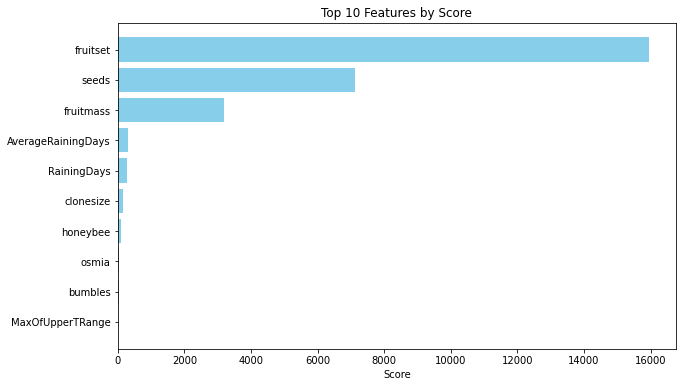

In [15]:
def fs_score_plot(fs_func, feature_names, top_n=10):
    scores = fs_func.scores_
    indices = np.argsort(scores)[-top_n:][::-1]   
    top_features = [feature_names[i] for i in indices]
    top_scores = scores[indices]

    
    plt.figure(figsize=(10, 6))
    plt.barh(top_features, top_scores, color='skyblue')
    plt.xlabel('Score')
    plt.title(f'Top {top_n} Features by Score')
    plt.gca().invert_yaxis()  
    plt.show()


feature_names ={i:names for i,names in enumerate(X_train.columns)}  # Assuming you don't have original feature names
fs_score_plot(fs_corr, feature_names)

In [16]:
X_test

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
341,12.5,0.25,0.25,0.75,0.75,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.601161,0.495799,41.363181
275,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.600341,0.496359,41.484534
66,12.5,0.25,0.25,0.25,0.25,69.7,42.1,58.2,50.2,24.3,41.2,34.0,0.56,0.406645,0.381269,30.057704
725,25.0,0.50,0.38,0.50,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.526502,0.463562,37.673614
538,25.0,0.50,0.25,0.50,0.75,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.532304,0.464892,37.782374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,12.5,0.25,0.25,0.25,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.590337,0.493534,41.176421
385,12.5,0.25,0.38,0.38,0.63,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.564982,0.467220,39.501881
381,12.5,0.25,0.38,0.38,0.63,69.7,42.1,58.2,50.2,24.3,41.2,16.0,0.26,0.574679,0.471713,40.039020
362,12.5,0.25,0.38,0.38,0.50,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.424394,0.412450,31.881847


 ### Feature Selection - mututal info regression         
 ###### most efffectively used for feature selection than correlation

In [17]:
def select_features_info_based(X_train,y_train,X_test):
    fs_info = SelectKBest(score_func=mutual_info_regression,k=10)
    fs_info.fit(X_train,y_train)
    X_train_info = fs_info.transform(X_train)
    X_test_info= fs_info.transform(X_test)
    
    return X_train_info, X_test_info, fs_info

In [18]:
X_train_info, X_test_info, fs_info = select_features_info_based(X_train, y_train, X_test)


In [19]:
joblib.dump(fs_info, 'selectkbest_model1.joblib')


['selectkbest_model1.joblib']

In [50]:
fs_info

SelectKBest(score_func=<function mutual_info_regression at 0x000001C81B2F2310>)

In [62]:
X_train_info.shape

(503, 10)

In [21]:
def fs_score_plot(fs_func):
    
    for i in range(len(fs_func.get_feature_names_out())):
        print('Feature %s: %f' % (fs_func.get_feature_names_out()[i], fs_func.scores_[i]))

fs_score_plot(fs_info)

Feature clonesize: 0.161689
Feature honeybee: 0.117059
Feature MaxOfLowerTRange: 0.056287
Feature MinOfLowerTRange: 0.070117
Feature AverageOfLowerTRange: 0.040676
Feature RainingDays: 0.116447
Feature AverageRainingDays: 0.116447
Feature fruitset: 0.116447
Feature fruitmass: 0.116447
Feature seeds: 0.116447


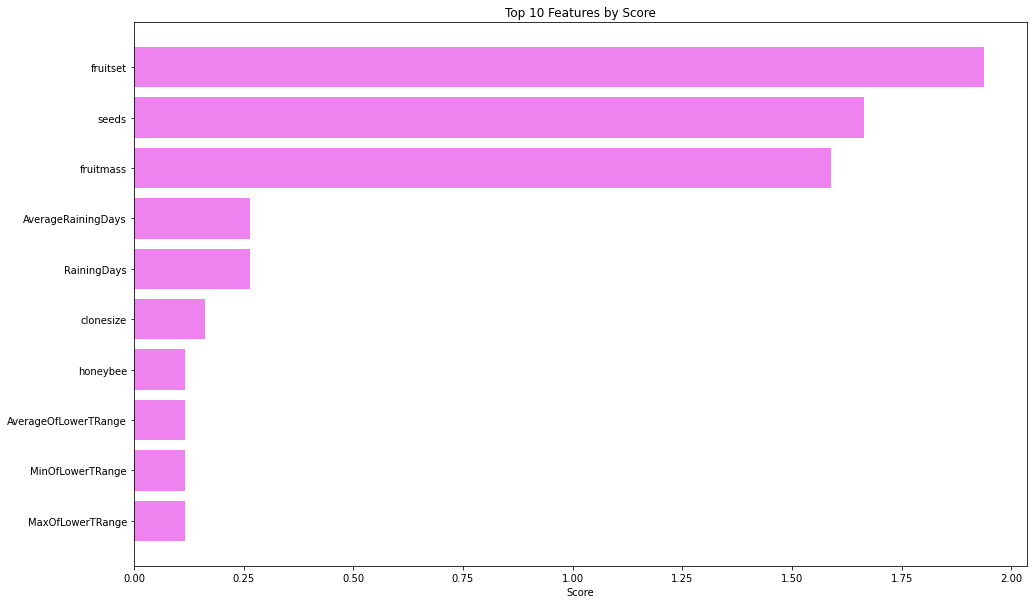

In [22]:
 def fs_score_plot(fs_func, feature_names, top_n=10):
    scores = fs_func.scores_
    indices = np.argsort(scores)[-top_n:][::-1]   
    top_features = [feature_names[i] for i in indices]
    top_scores = scores[indices]

    
    plt.figure(figsize=(16, 10))
    plt.barh(top_features, top_scores, color='Violet')
    plt.xlabel('Score')
    plt.title(f'Top {top_n} Features by Score')
    plt.gca().invert_yaxis()  
    plt.show()


feature_names ={i:names for i,names in enumerate(X_train.columns)}  # Assuming you don't have original feature names
fs_score_plot(fs_info, feature_names)

In [65]:
new_bbry_data=bbry_data_iqr[['fruitset','seeds','fruitmass','AverageRainingDays','RainingDays','clonesize','honeybee','AverageOfLowerTRange','MinOfLowerTRange','MaxOfLowerTRange','yield']]

In [66]:
X = new_bbry_data.drop("yield",axis=1)
y=new_bbry_data[["yield"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [68]:
X_train_model, X_test_model, fs_info_model= select_features_info_based(X_train, y_train, X_test)


In [69]:
X_train_model 

array([[ 0.40848785, 30.60468328,  0.40098013, ..., 55.9       ,
        33.        , 68.2       ],
       [ 0.51175153, 37.29886067,  0.45922443, ..., 45.8       ,
        27.        , 55.8       ],
       [ 0.64148025, 45.47838117,  0.52832219, ..., 50.8       ,
        30.        , 62.        ],
       ...,
       [ 0.52391434, 37.33160636,  0.4603691 , ..., 45.8       ,
        27.        , 55.8       ],
       [ 0.46555863, 32.9240208 ,  0.40903391, ..., 41.2       ,
        24.3       , 50.2       ],
       [ 0.46627946, 35.05053194,  0.43956537, ..., 55.9       ,
        33.        , 68.2       ]])

 
   ### LR

In [70]:
reg = LinearRegression()
reg.fit(X_train_model,y_train)
reg_pred = reg.predict(X_test_model)

In [71]:
mae_reg=mean_absolute_error(y_test,reg_pred)
mse_reg=mean_squared_error(y_test,reg_pred)
rmse_reg=np.sqrt(mse_reg)
r_sq_reg = r2_score(y_test,reg_pred)

print('MAE: %.3f' % mae_reg)
print('MSE: %.3f' % mse_reg)
print('RMSE: %.3f' % rmse_reg)
print('R-Square: %.3f' % r_sq_reg)
    

MAE: 111.904
MSE: 23093.324
RMSE: 151.965
R-Square: 0.987


### Random Forest

In [72]:
RF= RandomForestRegressor()
RF.fit(X_train_model,y_train)
RF_pred =RF.predict(X_test_model)

In [73]:
mae_rf=mean_absolute_error(y_test,RF_pred)
mse_rf=mean_squared_error(y_test,RF_pred)
rmse_rf=np.sqrt(mse_rf)
r_sq_rf= r2_score(y_test,RF_pred)

print('MAE: %.3f' % mae_reg)
print('MSE: %.3f' % mse_reg)
print('RMSE: %.3f' % rmse_reg)
print('R-Square: %.3f' % r_sq_reg)
    

MAE: 111.904
MSE: 23093.324
RMSE: 151.965
R-Square: 0.987


### Decision Tree

In [74]:
dtree = DecisionTreeRegressor()

dtree.fit(X_train_model, y_train)

dt_pred = dtree.predict(X_test_model)

In [75]:
mae_dt = mean_absolute_error(y_test, dt_pred)
mse_dt = mean_squared_error(y_test, dt_pred)
rmse_dt = np.sqrt(mse_dt)
rsq_dt = r2_score(y_test, dt_pred)

print('MAE: %.3f' % mae_dt)
print('MSE: %.3f' % mse_dt)
print('RMSE: %.3f' % rmse_dt)
print('R-Square: %.3f' % rsq_dt)

MAE: 146.283
MSE: 35594.817
RMSE: 188.666
R-Square: 0.980


### XGB

In [76]:
xgb = XGBRegressor()

xgb.fit(X_train_model, y_train)

xgb_pred = xgb.predict(X_test_model)

In [77]:
mae_xgb = mean_absolute_error(y_test, xgb_pred)
mse_xgb= mean_squared_error(y_test, xgb_pred)
rmse_xgb = np.sqrt(mse_xgb)
rsq_xgb= r2_score(y_test, xgb_pred)

print('MAE: %.3f' % mae_dt)
print('MSE: %.3f' % mse_dt)
print('RMSE: %.3f' % rmse_dt)
print('R-Square: %.3f' % rsq_dt)

MAE: 146.283
MSE: 35594.817
RMSE: 188.666
R-Square: 0.980


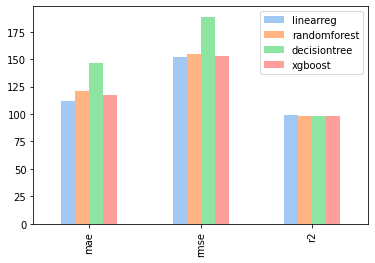

In [78]:
error_rec = {
    "linearreg": {
        "mae": mae_reg,
        "rmse": rmse_reg,
        'r2': r_sq_reg*100
    },
    "randomforest": {
        "mae": mae_rf,
        "rmse": rmse_rf,
        'r2': r_sq_rf*100
    },
    "decisiontree": {
        "mae": mae_dt,
        "rmse": rmse_dt,
        'r2': rsq_dt*100
    },
    "xgboost": {
        "mae": mae_xgb,
        "rmse": rmse_xgb,
        'r2': rsq_xgb*100
    },
}
pd.DataFrame(error_rec).plot(kind="bar", 
             color=[
                 sns.color_palette("pastel")[0], 
                 sns.color_palette("pastel")[1], 
                 sns.color_palette("pastel")[2], 
                 sns.color_palette("pastel")[3]]);

### Hyperparameter Tuning

In [79]:
cv = RepeatedKFold(n_splits= 50, n_repeats = 3, random_state = 1)
fs_info_v0 = SelectKBest(score_func = mutual_info_regression)


# define pipeline for each algorithm
# define GSCV for each
# loop through it

# pipe = Pipeline ([(preprocessing: scaling), (FS: selectKBEST), (modelling: model)])


pipe_lr = Pipeline([
    ('sel', fs_info_v0), 
    ('model', LinearRegression())
])

pipe_rf = Pipeline([
    ('sel', fs_info_v0), 
    ('model', RandomForestRegressor(random_state=1))
])

pipe_dtree = Pipeline([
    ('sel', fs_info_v0), 
    ('model', DecisionTreeRegressor(random_state=1))
])

pipe_xgb = Pipeline([
    ('sel', fs_info_v0), 
    ('model', XGBRegressor(random_state=1))
])

# pipe_lr.get_params().keys()

In [86]:

grid_params_lr = [{'sel__k': [i for i in range(X_train_model.shape[1]-6, X_train_model.shape[1]-4)],
        }] 


grid_params_rf = [{'sel__k': [i for i in range(X_train_model.shape[1]-6, X_train_model.shape[1]-4)],
        'model__max_depth': [15, 18, 10],
        'model__min_samples_split': [15, 18, 10]
                  }]


grid_params_dtree = [{'sel__k': [i for i in range(X_train_model.shape[1]-6, X_train_model.shape[1]-4)],
                     'model__max_depth': [15, 18, 10],
                     'model__max_features': ['auto', 'sqrt']
                     }]


grid_params_xgb = [{'sel__k': [i for i in range(X_train_model.shape[1]-6, X_train_model.shape[1]-4)],
                    'model__max_depth': [9,12],
                   'model__min_child_weight': [7,8],
                   'model__subsample': [i/10. for i in range(9,11)]
                   }]


# estimator (model), parameter (model), scoring

# def custom_metric(values):
#     #calculate metric
#     return metric_value

LR = GridSearchCV(estimator=pipe_lr,
            param_grid=grid_params_lr,
            scoring='neg_mean_absolute_error',
            cv=cv)

RF = GridSearchCV(estimator=pipe_rf,
            param_grid=grid_params_rf,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1)

DT = GridSearchCV(estimator=pipe_dtree,
            param_grid=grid_params_dtree,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1)

XGB = GridSearchCV(estimator=pipe_xgb,
            param_grid=grid_params_xgb,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1)

grids = [RF,XGB,DT]

# Creating a dict for our reference
grid_dict = { 
        0: 'Random Forest',
        1: 'XGBoost',
        2: 'Decision Tree'}

In [87]:
# Start form initial scaled model: X_train17 and X_test17, y_train17 and y_test17
def extract_best_model(grids: list, grid_dict: dict):
    print('Performing model optimizations...')
    least_mae = 270817
    best_regr = 0
    best_gs = ''
    for idx, gs in enumerate(grids):
        print('\nEstimator: %s' % grid_dict[idx])
        gs.fit(X_train_model,y_train.values.ravel())
        print('Best Config: %s' % gs.best_params_)
        print('Best MAE: %.3f' % gs.best_score_)
        y_pred_v0 = gs.predict(X_test_model)
        print('Test set mean absolute error for best params: %.3f ' % mean_absolute_error(y_test, y_pred_v0))
        print('Test set root mean squared error for best params: %.3f ' % np.sqrt(mean_absolute_error(y_test, y_pred_v0)))
        
        if mean_absolute_error(y_test, y_pred_v0) < least_mae:
            least_mae = mean_absolute_error(y_test, y_pred_v0)
            best_gs = gs
            best_regr = idx
    print('\nClassifier with least test set MAE: %s' % grid_dict[best_regr])

    
    return (grid_dict[best_regr], best_gs, least_mae)

In [88]:
best_model_name_v0, best_model_v0, least_mae_v0 = extract_best_model(grids= grids, grid_dict = grid_dict)

print(f"Best Model: {best_model_name_v0}")
print(f"Error Rate: {least_mae_v0}")
print(best_model_v0)

Performing model optimizations...

Estimator: Random Forest
Best Config: {'model__max_depth': 10, 'model__min_samples_split': 10, 'sel__k': 5}
Best MAE: -131.933
Test set mean absolute error for best params: 130.764 
Test set root mean squared error for best params: 11.435 

Estimator: XGBoost
Best Config: {'model__max_depth': 9, 'model__min_child_weight': 8, 'model__subsample': 1.0, 'sel__k': 4}
Best MAE: -130.155
Test set mean absolute error for best params: 140.283 
Test set root mean squared error for best params: 11.844 

Estimator: Decision Tree
Best Config: {'model__max_depth': 10, 'model__max_features': 'auto', 'sel__k': 5}
Best MAE: -161.361
Test set mean absolute error for best params: 163.512 
Test set root mean squared error for best params: 12.787 

Classifier with least test set MAE: Random Forest
Best Model: Random Forest
Error Rate: 130.76435364647762
GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=50, random_state=1),
             estimator=Pipeline(steps=[('sel',


In [89]:
best_model_v0.fit(X_train_model, y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=50, random_state=1),
             estimator=Pipeline(steps=[('sel',
                                        SelectKBest(score_func=<function mutual_info_regression at 0x000001C81B2F2310>)),
                                       ('model',
                                        RandomForestRegressor(random_state=1))]),
             n_jobs=-1,
             param_grid=[{'model__max_depth': [15, 18, 10],
                          'model__min_samples_split': [15, 18, 10],
                          'sel__k': [4, 5]}],
             scoring='neg_mean_absolute_error')

In [90]:
model_pred= best_model_v0.predict(X_test_model)


In [91]:
print('Test set mean absolute error for best params: %.3f ' % mean_absolute_error(y_test, model_pred))
print('Test set root mean squared error for best params: %.3f ' % np.sqrt(mean_absolute_error(y_test, model_pred)))
    

Test set mean absolute error for best params: 130.764 
Test set root mean squared error for best params: 11.435 


## Model Dump

In [92]:
# Save best grid search pipeline to file
 
joblib.dump(best_model_v0, 'best_model_v0.joblib')
     
 

['best_model_v0.joblib']

In [41]:
loaded_model = joblib.load('best_model_v0.pkl')

In [42]:
cc=loaded_model.predict(X_test_info)

In [43]:
print('Test set mean absolute error for best params: %.3f ' % mean_absolute_error(y_test, cc))
print('Test set root mean squared error for best params: %.3f ' % np.sqrt(mean_absolute_error(y_test, cc)))
    

Test set mean absolute error for best params: 130.737 
Test set root mean squared error for best params: 11.434 


In [44]:
features112=['fruitset','seeds','fruitmass','AverageRainingDays','RainingDays','clonesize','honeybee','AverageOfLowerTRange','MinOfLowerTRange','MaxOfLowerTRange']

for i in features112:
    print(i)
    print(f"Min = {X_train[i].min()}")
    print(f"Max = {X_train[i].max()}")
    print("\n")

fruitset
Min = 0.309669459
Max = 0.652144089


seeds
Min = 27.3454535
Max = 46.36934409


fruitmass
Min = 0.358821427
Max = 0.535660479


AverageRainingDays
Min = 0.1
Max = 0.56


RainingDays
Min = 1.0
Max = 34.0


clonesize
Min = 12.5
Max = 37.5


honeybee
Min = 0.25
Max = 0.75


AverageOfLowerTRange
Min = 41.2
Max = 55.9


MinOfLowerTRange
Min = 24.3
Max = 33.0


MaxOfLowerTRange
Min = 50.2
Max = 68.2




SelectKBest(score_func=<function mutual_info_regression at 0x000001C81B2F2310>)

In [85]:
y_train.values.ravel()

array([4281.52619 , 5919.430755, 8711.208961, 5746.777027, 7628.6476  ,
       6098.113172, 5637.984297, 4858.240729, 6515.261449, 4644.601168,
       6826.208733, 6254.655109, 4334.841218, 4930.619033, 3748.465467,
       6948.2288  , 4228.818878, 5004.154338, 5739.680287, 4323.930991,
       7406.902484, 7935.094765, 5852.874202, 7557.46014 , 4042.842643,
       3941.255122, 5575.394471, 5566.52275 , 5455.118908, 4179.185917,
       4926.279024, 5596.226357, 7019.694384, 2825.003738, 8212.792891,
       5720.723161, 5632.459174, 7690.174905, 6493.472526, 8655.676437,
       5329.263197, 4045.479657, 7184.013843, 5154.975914, 4163.823044,
       4769.318273, 3496.352359, 6026.063649, 3385.364224, 3436.493543,
       3182.698648, 5299.661325, 6942.396304, 6801.49205 , 4068.350665,
       4125.757119, 5492.81699 , 7761.15796 , 7714.323102, 6024.945992,
       8007.206207, 4867.94772 , 7298.002602, 6117.4759  , 6188.477141,
       5948.114471, 4010.552148, 7127.164572, 5649.03716 , 5817.

In [64]:
bbry_data_iqr[['fruitset','seeds','fruitmass','AverageRainingDays','RainingDays','clonesize','honeybee','AverageOfLowerTRange','MinOfLowerTRange','MaxOfLowerTRange','yield']]

,fruitset,seeds,fruitmass,AverageRainingDays,RainingDays,clonesize,honeybee,AverageOfLowerTRange,MinOfLowerTRange,MaxOfLowerTRange,yield
0,0.410652,31.678898,0.408159,0.26,16.0,37.5,0.75,50.8,30.0,62.0,3813.165795
1,0.444254,33.449385,0.425458,0.10,1.0,37.5,0.75,50.8,30.0,62.0,4947.605663
2,0.383787,30.546306,0.399172,0.26,16.0,37.5,0.75,55.9,33.0,68.2,3866.798965
3,0.407564,31.562586,0.408789,0.10,1.0,37.5,0.75,55.9,33.0,68.2,4303.943030
4,0.354413,28.873714,0.382703,0.39,24.0,37.5,0.75,50.8,30.0,62.0,3436.493543
...,...,...,...,...,...,...,...,...,...,...,...
754,0.558394,39.448650,0.478666,0.10,1.0,25.0,0.50,45.8,27.0,55.8,7184.013843
755,0.494678,34.784888,0.429703,0.26,16.0,25.0,0.50,41.2,24.3,50.2,6292.960756
756,0.502842,35.185971,0.430369,0.10,1.0,25.0,0.50,41.2,24.3,50.2,6374.444297
757,0.513889,37.209554,0.458966,0.39,24.0,25.0,0.50,45.8,27.0,55.8,6180.951419
